In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt

In [2]:
breast_cancer_data = load_breast_cancer()
# Take a look at the data:
print(breast_cancer_data.data)
print(breast_cancer_data.feature_names)
print(breast_cancer_data.target)
print(breast_cancer_data.target_names)
# 0 --> malignant
# 1 --> benign

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [3]:
# Split the data into training and validation sets:
training_data, validation_data, training_labels, validation_label = train_test_split(breast_cancer_data.data, breast_cancer_data.target, test_size = 0.2, random_state = 100) # test_size is the percentage of data used for the testing set (here 20%)

print(len(training_data))
print(len(training_labels))

455
455


In [11]:
# Let's test the best k size:
accuracies = []
for k in range(1, 101): 
  # Create the classifier:
  classifier = KNeighborsClassifier(n_neighbors = k)
  # Train the classifier:
  classifier.fit(training_data, training_labels)
  accuracies.append(classifier.score(validation_data, validation_label))
  #print(classifier.score(validation_data, validation_label))

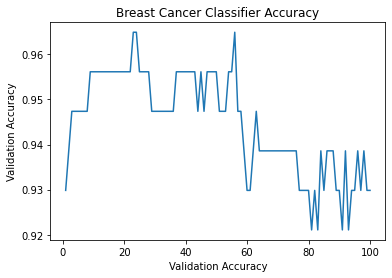

In [13]:
# Plot the results:
k_list = range(1,101)
plt.plot(k_list, accuracies)
plt.xlabel('Validation Accuracy')
plt.ylabel('Validation Accuracy')
plt.title('Breast Cancer Classifier Accuracy')
plt.show()

In [14]:
# Print the k that results with the largest accuracy:
print(accuracies.index(max(accuracies)))

22


In [17]:
# Now that we know the best k, we can build the model:
model = KNeighborsClassifier(n_neighbors = 22)
# Train the model:
model.fit(training_data, training_labels)
# The predictions:
print(model.predict(validation_data))

[0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0
 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0
 1 0 1]
